In [15]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import glob, os
%matplotlib inline

In [3]:
# Feature Engineering
# Step 1: Interpolating the missing time stamp data 
def Interpolating_missing_data(df_all):
    df = df_all.drop(['cell_id', 'end_time'], axis=1)
    df['start_time'] = pd.to_datetime(df['start_time'])
    df.set_index('start_time', inplace=True)
    df = df.tz_localize('UTC')
    df = df.tz_convert('Asia/Kolkata')
    df = df.resample('15Min').mean()
    df = df.reset_index()
    df = df.interpolate(method='linear')
    print("Interpolated data for missing {} timestamps".format(len(df) - len(df_all)))
    return df

In [12]:
# Feature Engineering
# Step 2: Calculating the actual KPI using NUM/DEN 
def KPI_derivation(row):
    row.dl_ue_avg_throughput = row.dl_ue_throughput_num/row.dl_ue_throughput_den if row.dl_ue_throughput_den else 0
    row.ul_ue_avg_throughput = row.ul_ue_throughput_num/row.ul_ue_throughput_den if row.ul_ue_throughput_den else 0
    row.average_rrc_connected = row.rrc_conn_num/row.rrc_conn_den  if row.rrc_conn_den else 0
    row.prb_util = (row.dl_prb_util_num * 100 )/row.dl_prb_util_den if row.dl_prb_util_den else 0
    row.pdcch_util = (row.pdcch_num * 100 )/row.pdcch_den if row.pdcch_den else 0
    row.rrc_success_rate = (row.rrc_estab_succ * 100 )/row.rrc_estab_att if row.rrc_estab_att else 0
        
    return row

def Calculating_KPI(df):
    df = df.assign(dl_ue_avg_throughput=np.nan, ul_ue_avg_throughput=np.nan, average_rrc_connected=np.nan,
                   prb_util=np.nan, pdcch_util=np.nan, rrc_success_rate=np.nan)
    df = df.apply(KPI_derivation, axis=1)
    intermediate_kpis = ['dl_ue_throughput_num', 'dl_ue_throughput_den', 'ul_ue_throughput_num', 'ul_ue_throughput_den',
                         'rrc_conn_num', 'rrc_conn_den', 'dl_prb_util_num', 'dl_prb_util_den', 'pdcch_num', 'pdcch_den',
                         'rrc_estab_succ', 'rrc_estab_att']
    
    df = df.drop(intermediate_kpis, axis=1)
    return df

In [6]:
# Feature Engineering
def feature_engineering(df_all):
    df = Interpolating_missing_data(df_all)
    df = Calculating_KPI(df)    
    return df


Interpolated data for missing 1 timestamps


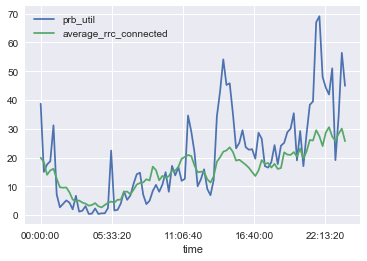

Interpolated data for missing 1 timestamps


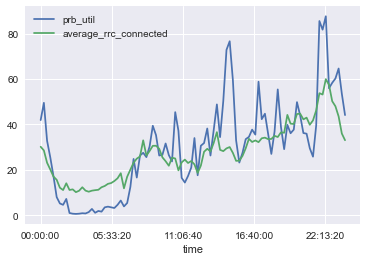

Interpolated data for missing -1 timestamps


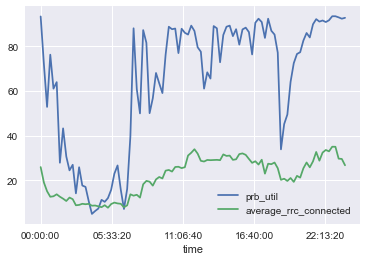

Interpolated data for missing -2 timestamps


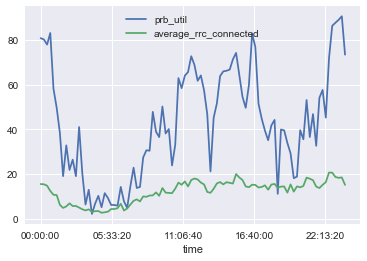

In [30]:
relavent_kpis = ['dl_ue_throughput_num', 'dl_ue_throughput_den', 'ul_ue_throughput_num', 'ul_ue_throughput_den',
                     'rrc_conn_num', 'rrc_conn_den', 'dl_prb_util_num', 'dl_prb_util_den', 'pdcch_num', 'pdcch_den',
                     'rrc_estab_succ', 'rrc_estab_att'] + ['cell_id', 'end_time', 'start_time']


path = '../pm_files/Cells_With_ICLB_Action/pm_files'
kpi_list = ['prb_utilization_norm', 'pdcch_utilization_norm', 'avg_rrc_conn_norm', 'ul_ue_avg_tp_norm', 'rrc_succ_rate_norm', 'dl_ue_avg_tp_norm', ]
i = 0
for filename in glob.glob(os.path.join(path, '*.csv')):

    df_all = pd.read_csv(filename)
    df_relv = df_all[relavent_kpis]
    df = feature_engineering(df_relv)
    df['time'] = df['start_time'].dt.time
    df.set_index('time', inplace=True)
    df[['prb_util', 'average_rrc_connected']][0:96].plot()
    plt.show()
    #print(df.head(20))
    i = i+1
    #print(df.head(2))